In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data.csv')

In [4]:
df['Trader'].replace(['trader A', 'trader B', 'trader C', 'trader E'], [0, 1, 2, 3], inplace=True)
df['Status'].replace(['Closed', 'Sold'], [0,1], inplace=True)
df['Trade Type'].replace(['Call', 'Put'], [0,1], inplace=True)

In [5]:
df = df.drop(['Asset Name'], axis=1)

In [6]:
df['Trading Time'] = pd.to_datetime(df['Trading Time'])
df['Close Time'] = pd.to_datetime(df['Close Time'])

In [7]:
df = df.drop(['Trading Time', 'Close Time'], axis=1)

In [8]:
!pip install minisom

  Created wheel for minisom: filename=MiniSom-2.3.0-py3-none-any.whl size=9018 sha256=d1f0186f86fd7acef29b9ca0f7fb0e55d4c135af3002c74e0b620f702ffcb57e
  Stored in directory: c:\users\drabc\appdata\local\pip\cache\wheels\7e\47\6d\97ad48be13d8b0fc231b7df226a3d6645820c32559822a826c
Successfully built minisom


In [9]:
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom

In [11]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
mm = MinMaxScaler(feature_range = (0, 1))
X = mm.fit_transform(X)
som = MiniSom(x = 10, y = 10, input_len = 7, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

In [12]:
from pylab import bone, pcolor, colorbar, plot, show

TypeError: list indices must be integers or slices, not numpy.float64

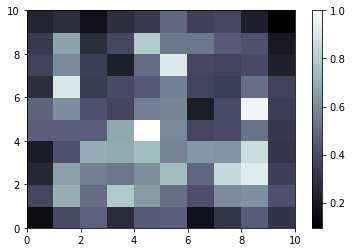

In [14]:
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']

for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0]+0.5, w[1]+0.5, markers[y[i]], markeredgecolor = colors[y[i]],
    markerfacecolor = 'None', markersize = 15, markeredgewidth = 2)

show()

In [15]:
mappings = som.win_map(X)
# Finding frauds
import numpy as np
frauds = np.concatenate((mappings[(5, 9)], mappings[(2,6)]), axis = 0)
frauds = mm.inverse_transform(frauds)

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)